# 다중 숫자 순차열 데이터 다중 예측 Template


# 데이터 준비

In [1]:
import numpy as np
import matplotlib.pyplot as plt


## 기반 숫자열 생성

In [2]:
numbers = np.zeros((2000,2))
numbers[:,0] = np.sin(np.arange(0,1000,0.5))
numbers[:,1] = np.cos(np.arange(0,1000,0.5))

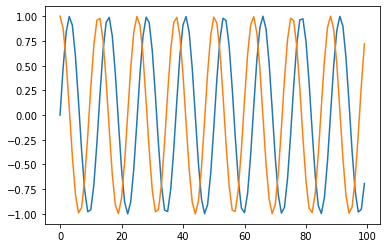

In [3]:
plt.plot(numbers[:100,0])
plt.plot(numbers[:100,1])
plt.show()

In [4]:
SEQUENCE_LENGTH = 5
OFFSET = 1

## 입출력 데이터 생성

[12345678901234567890, 34567890123456789012]의 숫자열 2개로 다음의 입출력 데이터를 생성한다.
```
[12345, 34567] -> [6, 8]
[23456, 45678] -> [7, 9]
[34567, 56789] -> [8, 0]
...
[56789, 78901] -> [0, 2]
```

In [5]:
raw_x = []
raw_y = []

for i in range(len(numbers)):
  if i+SEQUENCE_LENGTH+OFFSET >= len(numbers): break
  raw_x.append(numbers[i:i+SEQUENCE_LENGTH,:])
  raw_y.append(numbers[i+SEQUENCE_LENGTH+OFFSET-1,:])
#              0         1              
#              01234567890123456789
# numbers[0] = 12345678901234567890
#                 i = 3
#                 <-x0>   = [3:8] = 45678
#                      y  = [8]   = 9
# numbers[1] = 34567890123456789012
#                 i = 3
#                 <-x1>   = [3:8] = 67890
#                      y  = [8]   = 1



In [6]:
print(len(raw_x))
# len(raw_x) = 1994 = len(numbers) - SEQUENCE_LENGTH - OFFSET = 2000 - 5 - 1

1994


## 데이터를 2차원 벡터화 하기

RNN은 2차원 입력을 전제로 한다. 다중 숫자열은 그 자체로 2차원 데이터이다. 따로 해줄 것은 없다.


In [7]:
print(raw_x[0])

[[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]


In [8]:
x = np.array(raw_x)
y = np.array(raw_y)
print(x.shape)
print(y.shape)

split_at = int(len(x)*0.9)
(train_x, test_x) = x[:split_at], x[split_at:]
(train_y, test_y) = y[:split_at], y[split_at:]

print("Training Data:")
print(train_x.shape)
print(train_y.shape)

print("Test Data:")
print(test_x.shape)
print(test_y.shape)


(1994, 5, 2)
(1994, 2)
Training Data:
(1794, 5, 2)
(1794, 2)
Test Data:
(200, 5, 2)
(200, 2)


준비된 데이터는 다음과 같습니다.

train_x[0]
 [[ 0.          1.        ]
 [ 0.47942554  0.87758256]
 [ 0.84147098  0.54030231]
 [ 0.99749499  0.0707372 ]
 [ 0.90929743 -0.41614684]]

train_y[0]
 [ 0.59847214 -0.80114362]


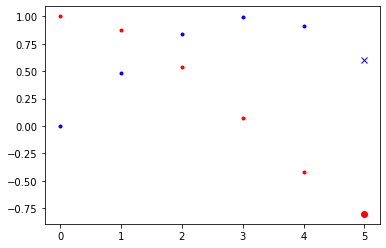

In [9]:
print("train_x[0]\n", train_x[0])
print()
print("train_y[0]\n", train_y[0])

plt.plot(train_x[0].T[0], '.', color='blue')
plt.plot([len(train_x[0])], train_y[0,0], 'x', color='blue')
plt.plot(train_x[0].T[1], '.', color='red')
plt.plot([len(train_x[0])], train_y[0,1], 'o', color='red')

plt.show()

# Template

## LSTM

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 128)               67072     
                                                                 
 flatten (Flatten)           (None, 128)               0         
                                                                 
 dense (Dense)               (None, 2)                 258       
                                                                 
Total params: 67,330
Trainable params: 67,330
Non-trainable params: 0
_________________________________________________________________


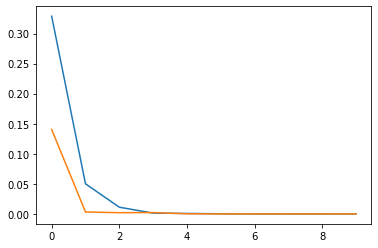

7/7 [==============================] - 0s 4ms/step - loss: 5.0143e-07 - mape: 0.2111
loss= 5.014317707718874e-07
mape= 0.2110861837863922


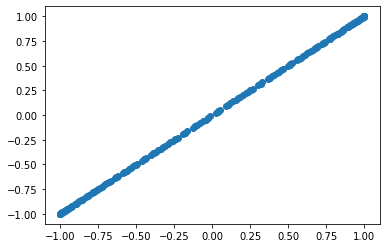

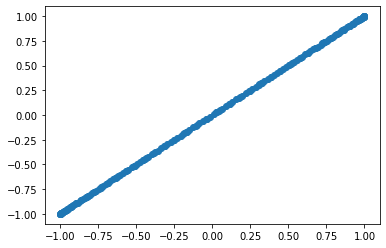

In [10]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## GRU

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 128)               50688     
                                                                 
 flatten_1 (Flatten)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 2)                 258       
                                                                 
Total params: 50,946
Trainable params: 50,946
Non-trainable params: 0
_________________________________________________________________


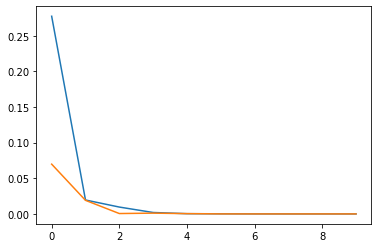

7/7 [==============================] - 0s 3ms/step - loss: 6.2259e-07 - mape: 0.1910
loss= 6.22589311660704e-07
mape= 0.19095319509506226


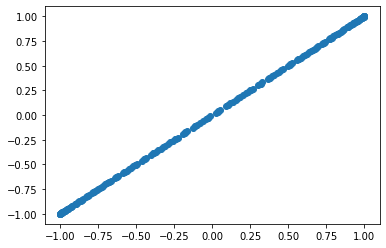

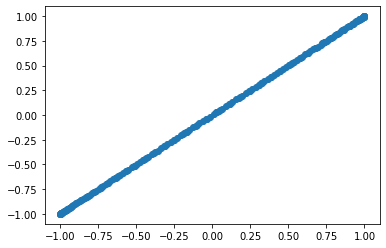

In [11]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(GRU(128, input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## Bidirectional + LSTM

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional (Bidirectiona  (None, 256)              134144    
 l)                                                              
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 2)                 514       
                                                                 
Total params: 134,658
Trainable params: 134,658
Non-trainable params: 0
_________________________________________________________________


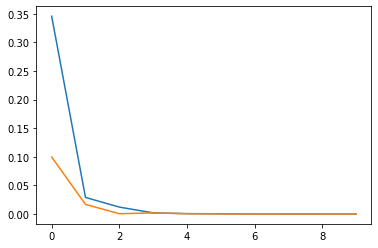

7/7 [==============================] - 0s 4ms/step - loss: 1.1151e-06 - mape: 0.1907
loss= 1.1150791578984354e-06
mape= 0.19070425629615784


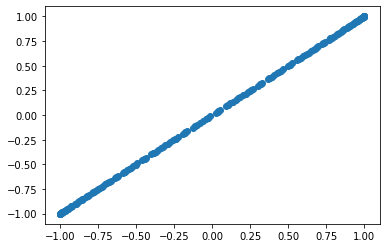

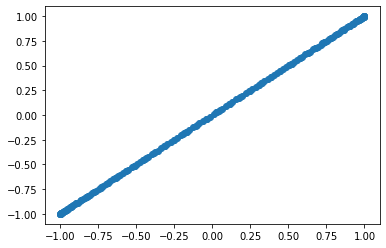

In [12]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(Bidirectional(LSTM(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## Bidirectional + GRU

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 bidirectional_1 (Bidirectio  (None, 256)              101376    
 nal)                                                            
                                                                 
 flatten_3 (Flatten)         (None, 256)               0         
                                                                 
 dense_3 (Dense)             (None, 2)                 514       
                                                                 
Total params: 101,890
Trainable params: 101,890
Non-trainable params: 0
_________________________________________________________________


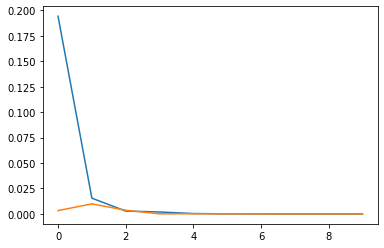

7/7 [==============================] - 0s 4ms/step - loss: 8.1318e-08 - mape: 0.0680
loss= 8.131794970722694e-08
mape= 0.06804505735635757


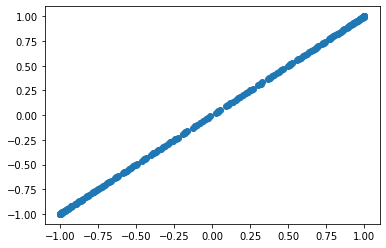

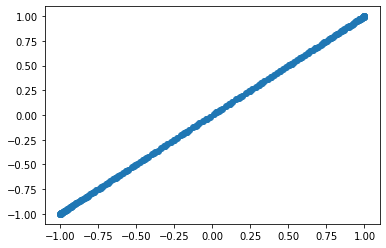

In [13]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(Bidirectional(GRU(128), input_shape=input_shape))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## stacked

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 5, 128)            67072     
                                                                 
 lstm_3 (LSTM)               (None, 128)               131584    
                                                                 
 flatten_4 (Flatten)         (None, 128)               0         
                                                                 
 dense_4 (Dense)             (None, 2)                 258       
                                                                 
Total params: 198,914
Trainable params: 198,914
Non-trainable params: 0
_________________________________________________________________


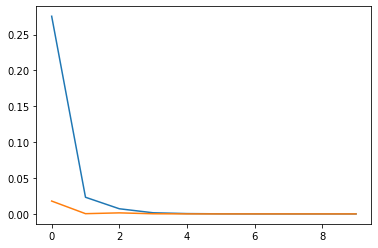

7/7 [==============================] - 0s 5ms/step - loss: 3.1000e-07 - mape: 0.1405
loss= 3.099964374086994e-07
mape= 0.14053188264369965


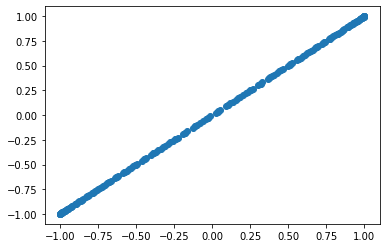

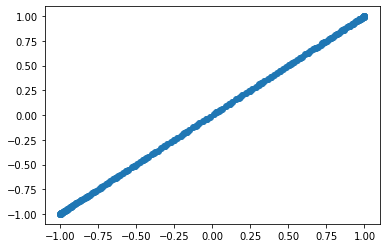

In [14]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(LSTM(128, input_shape=input_shape, return_sequences=True))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## CNN

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5, 32)             224       
                                                                 
 conv1d_1 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2, 32)            0         
 )                                                               
                                                                 
 conv1d_2 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 conv1d_3 (Conv1D)           (None, 2, 32)             3104      
                                                                 
 max_pooling1d_1 (MaxPooling  (None, 1, 32)            0         
 1D)                                                  

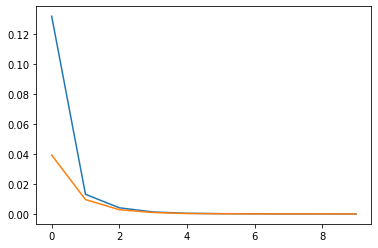

7/7 [==============================] - 0s 5ms/step - loss: 3.0561e-05 - mape: 1.5748
loss= 3.056078639929183e-05
mape= 1.574761152267456


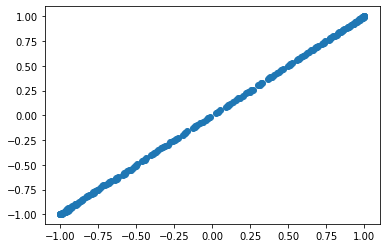

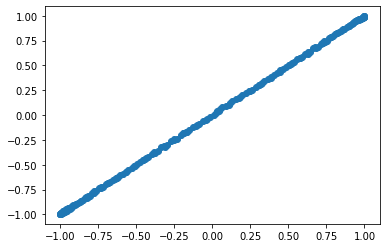

In [15]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Conv1D(32, 3, padding="same"))
model.add(Conv1D(32, 3, padding="same"))
model.add(MaxPooling1D())
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()

## CNN + LSTM

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d_4 (Conv1D)           (None, 5, 32)             224       
                                                                 
 conv1d_5 (Conv1D)           (None, 5, 32)             3104      
                                                                 
 lstm_4 (LSTM)               (None, 128)               82432     
                                                                 
 flatten_6 (Flatten)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 2)                 258       
                                                                 
Total params: 86,018
Trainable params: 86,018
Non-trainable params: 0
_________________________________________________________________


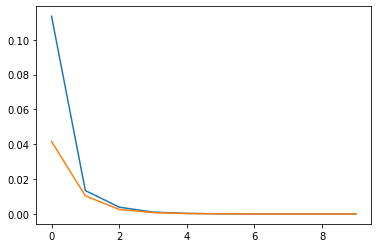

7/7 [==============================] - 0s 4ms/step - loss: 9.9526e-07 - mape: 0.1876
loss= 9.95262212200032e-07
mape= 0.18758781254291534


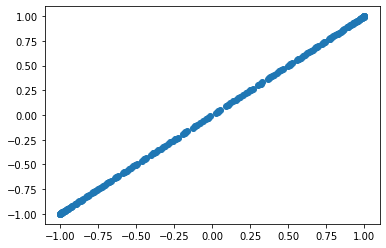

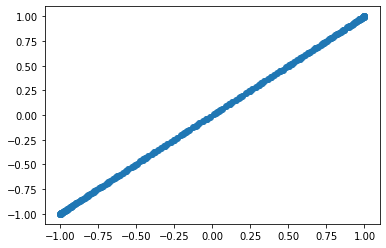

In [16]:
from tensorflow import keras
from tensorflow.keras.layers import Dense, RepeatVector, Flatten
from tensorflow.keras.layers import Bidirectional, LSTM, GRU
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Conv1D, MaxPooling1D, Input, Reshape

input_shape = train_x.shape[1:]
# input_shape = (5,2)
output_shape = train_x.shape[-1]
# output_shape = 2

model = keras.Sequential()
model.add(Conv1D(32, 3, padding="same", input_shape=input_shape))
model.add(Conv1D(32, 3, padding="same"))
model.add(LSTM(128))
model.add(Flatten())
model.add(Dense(output_shape))
model.compile(loss="mse", optimizer="adam", metrics=["mape"])
model.summary()

history = model.fit(train_x, train_y, epochs=10, verbose=1, validation_split=0.1, batch_size=128)


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()



loss, mape = model.evaluate(test_x, test_y)
print("loss=", loss)
print("mape=", mape)



y_ = model.predict(test_x).squeeze()
for i in range(output_shape):
    plt.scatter(test_y[:,i], y_[:,i])
    plt.show()